In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.
Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


Data Exploration

In [4]:
df.shape

(7565, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [6]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [7]:
df['size'] = pd.to_numeric(df['size'], errors='coerce')

Yuqoridagi jadvaldan xulosa: price va size ustunlari object malumot turida berilgan va bularni sonli korinishga otkazish kerak.


Ma'lumotlarni tahlil qilishning yana bir usuli - vizualizasiya

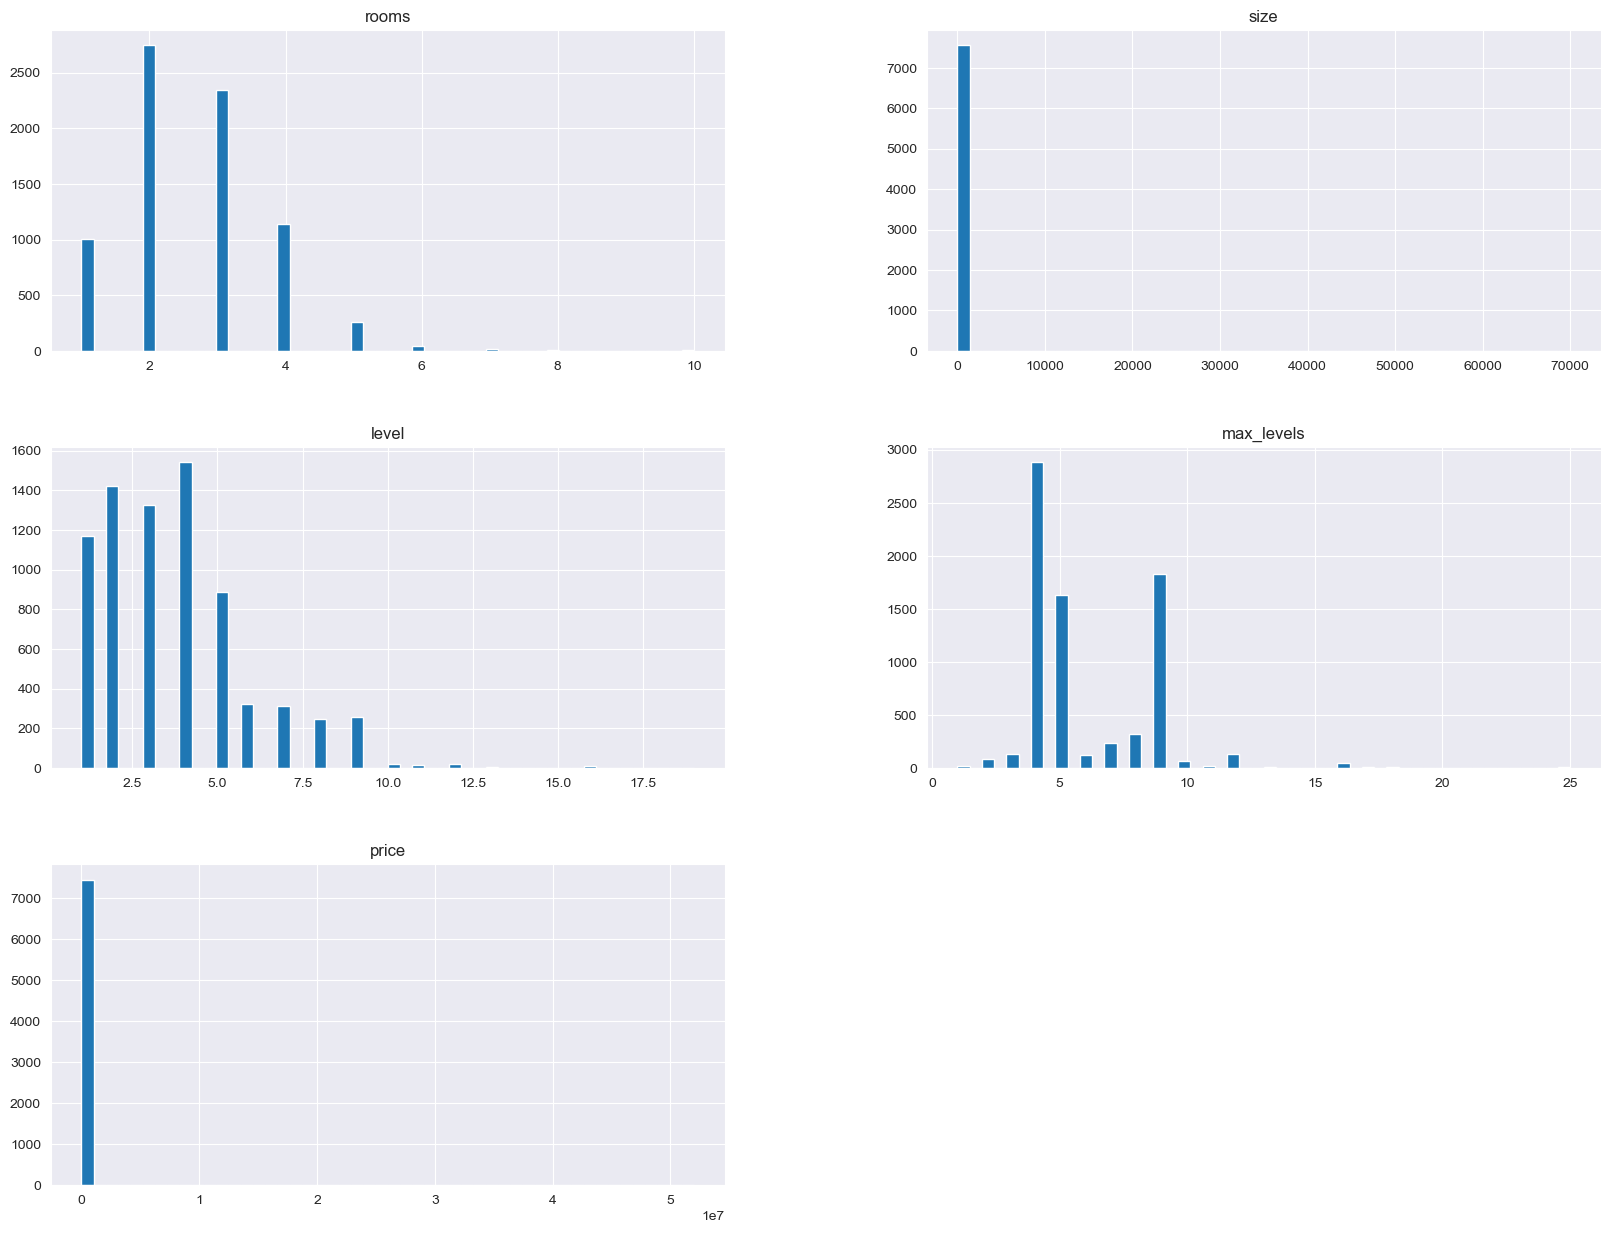

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df.isnull().sum()

location       0
district       0
rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

In [10]:
df.dropna(subset=['price'], inplace=True)
df.dropna(subset=['size'], inplace=True)

In [12]:
df.shape

(7465, 7)

Jadvalning price ustunida va size ustunlarida outlierlar mavjud biz bularni filtrlab olishimiz kerak


In [13]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


Size ustunidagi noadatiy qiymatga ega bolgan barcha qatorlani ochirib yubordik chunki kelajakda bunday qiymatlar modelimiz notogri ishlashiga olib keladi.

In [15]:
df = df.drop(df[df['size']<15][df['rooms']>1].index)
df = df.drop(df[df['size']>250].index)

C:\Users\suyun\AppData\Local\Temp\ipykernel_17472\2935047805.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[df['size']<15][df['rooms']>1].index)


Uylarning narxlaridaham ushbu nomutanosiblikni kuzatishimiz mumkin minimal narx 2 USD desak max narx 52000000 USD , buham juda katta.

Xuddi shunday price ustunida ham noodatiy qiymatlarni filtrlaymiz.

In [25]:
df.price.agg(['max', 'min'])

max    52000000.0
min       15000.0
Name: price, dtype: float64

In [32]:
df = df.drop(df[df['price'] >= 250000.0].index)

In [20]:
df = df.drop(df[df['price']<15000.0][df['rooms']==1].index)

C:\Users\suyun\AppData\Local\Temp\ipykernel_17472\1649816281.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[df['price']<15000.0][df['rooms']==1].index)


In [18]:
df = df.drop(df[df['price']==2400.0].index)
df = df.drop(df[df['price']<15000.0][df['rooms']>1].index)

C:\Users\suyun\AppData\Local\Temp\ipykernel_17472\4163301525.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[df['price']<15000.0][df['rooms']>1].index)


In [35]:
df.price.agg(['max', 'min'])

max    240000.0
min     15000.0
Name: price, dtype: float64

In [33]:
df.describe()

,rooms,size,level,max_levels,price
count,7263.000000,7263.000000,7263.000000,7263.000000,7263.000000
mean,2.596035,70.940168,3.697921,6.012805,55398.412639
std,1.029633,29.544273,2.240105,2.605098,32016.784346
min,1.000000,15.000000,1.000000,1.000000,15000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,2.000000,65.000000,3.000000,5.000000,46000.000000
75%,3.000000,84.000000,5.000000,9.000000,65000.000000
max,8.000000,246.000000,19.000000,25.000000,240000.000000


In [100]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
# df.drop('location', axis=1, inplace=True)

In [102]:
housing_label = train_set['price'].copy()  # uy narxlari
housing_data = train_set.drop('price', axis=1) # uy attributlari, narxsiz.
housing_data


,district,rooms,size,level,max_levels
2541,Мирзо-Улугбекский,3,75.0,3,4
6960,Чиланзарский,1,30.0,4,4
5006,Яшнободский,1,35.0,7,9
2999,Чиланзарский,2,50.0,2,4
4007,Мирзо-Улугбекский,4,93.0,2,4
...,...,...,...,...,...
3934,Юнусабадский,5,183.5,4,5
5416,Чиланзарский,2,62.0,8,9
5451,Чиланзарский,3,98.0,9,9
5620,Олмазорский,2,60.0,3,4


In [103]:
housing = train_set.copy()

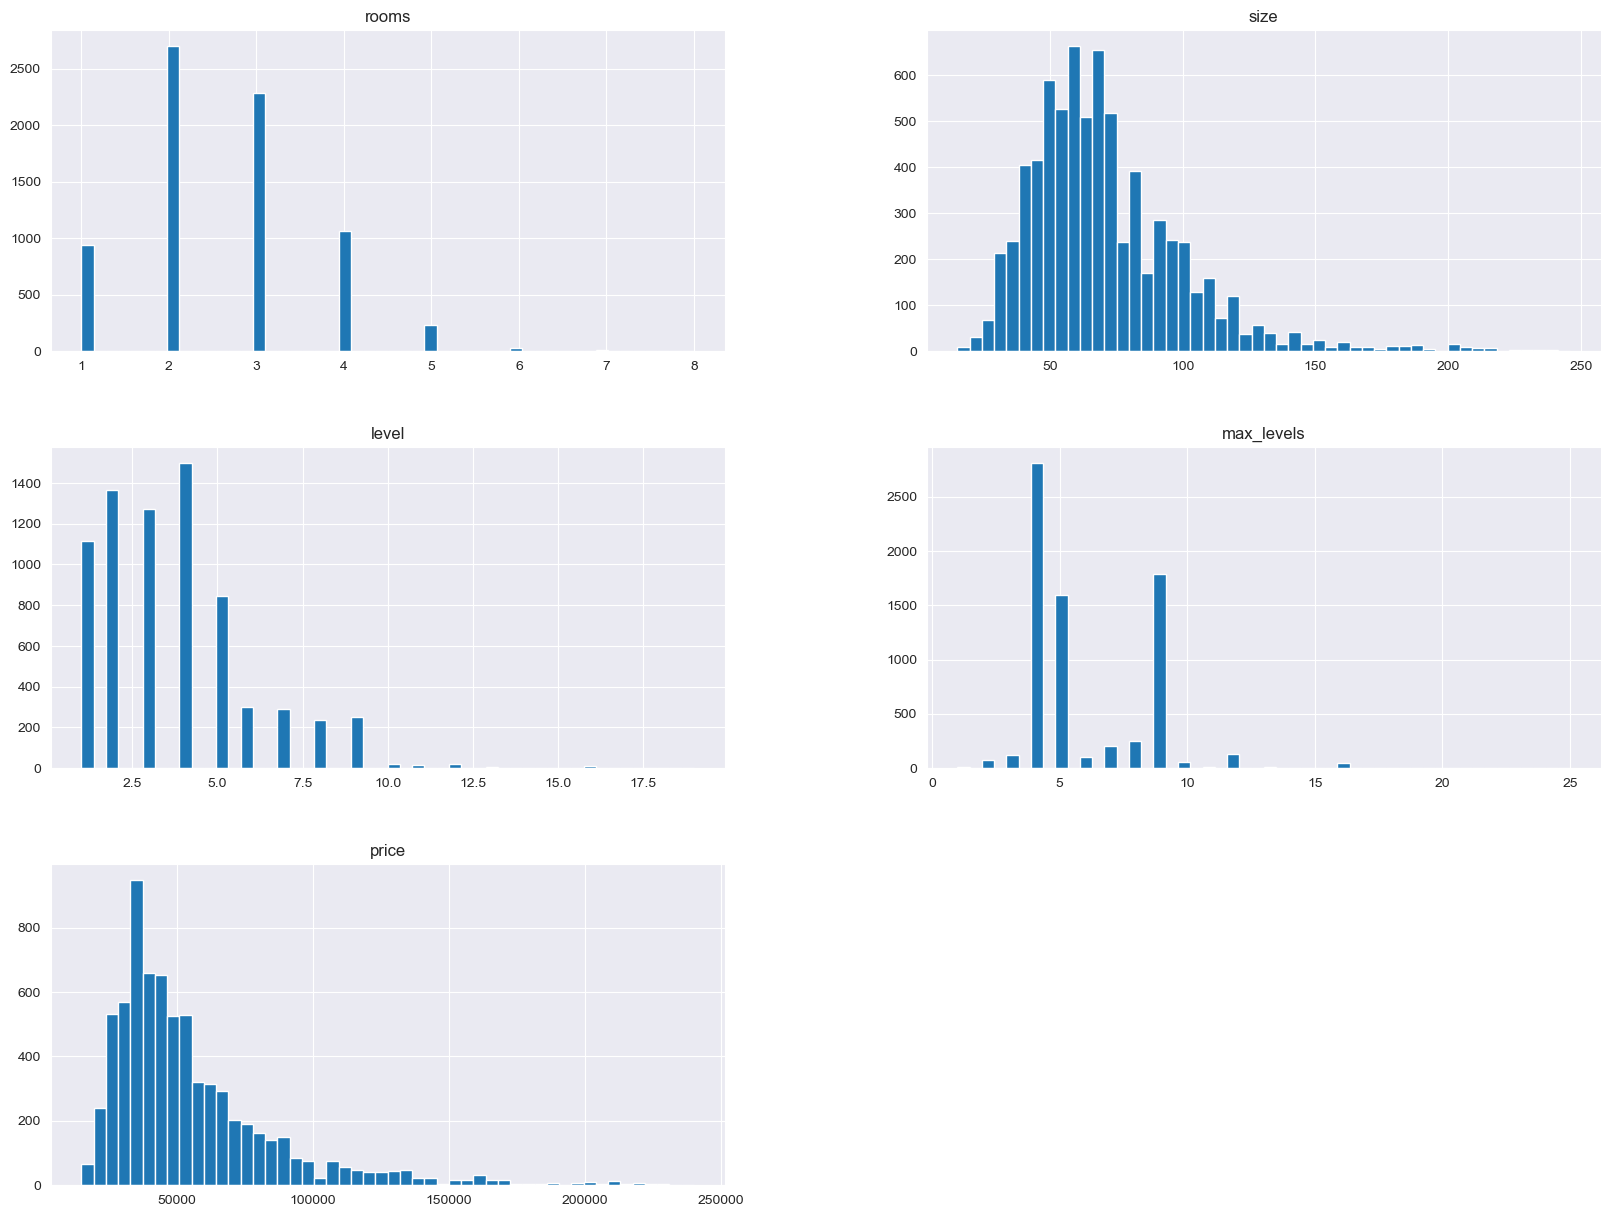

In [104]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Correlation

In [105]:
housing.corrwith(housing['price'], numeric_only=True).sort_values(ascending=False)

price         1.000000
size          0.795871
rooms         0.592311
max_levels    0.259828
level         0.075852
dtype: float64

Yuqoridagi korrelatsiyadan korinib turibdiki, price, size, rooms ustunlari ortasidagi korrelation ancha kuchli yani bir biriga bogliq.

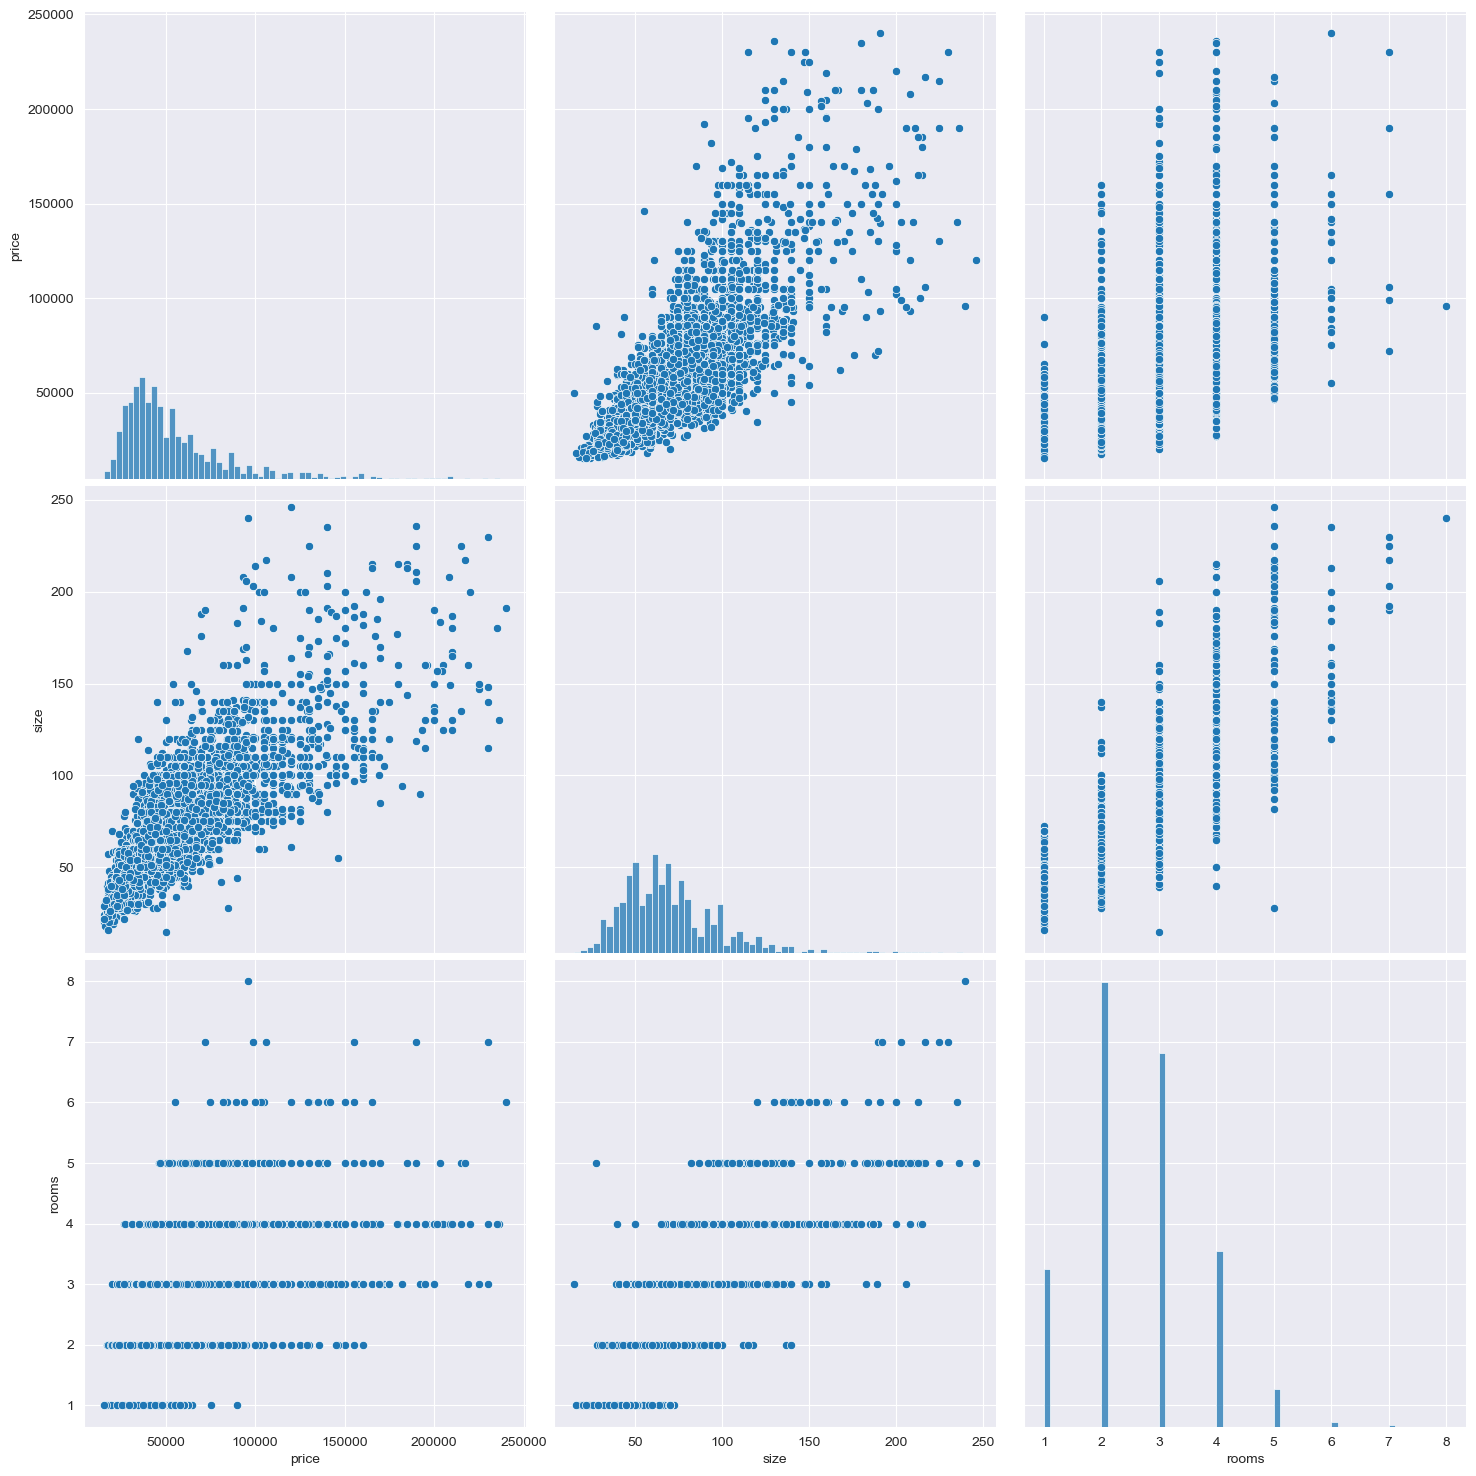

In [106]:
cols = ['price','size','rooms']
sns.pairplot(housing[cols], height=5)
plt.show()

grafiklarda eng kuchli korrelatsiya bu uy narxi va uning hajmi ortasida ekan chunki uyning hajmi oshgani sari uy narxi ham oshib bormoqda.

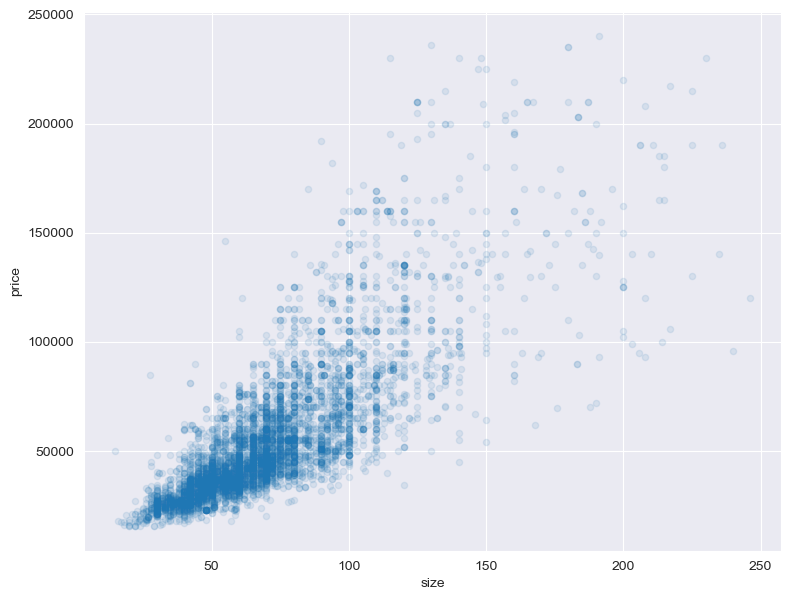

In [107]:
housing.plot(kind='scatter', x="size", y="price", alpha=0.1, figsize=(9,7))
plt.show()

Data preprocessing


In [108]:
housing['district']  # matnli qiymatlar -- bularni sonli qiymat korinishiga aylantirish kerak

2541    Мирзо-Улугбекский
6960         Чиланзарский
5006          Яшнободский
2999         Чиланзарский
4007    Мирзо-Улугбекский
              ...        
3934         Юнусабадский
5416         Чиланзарский
5451         Чиланзарский
5620          Олмазорский
897         Яккасарайский
Name: district, Length: 5810, dtype: object

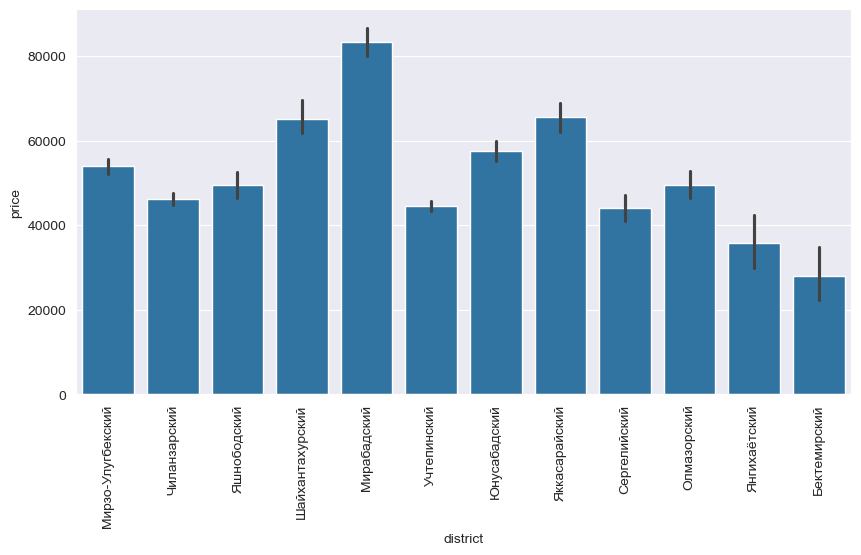

In [122]:
plt.figure(figsize = (10,5))
sns.barplot(data=housing, x='district', y='price')
plt.xticks(rotation=90)
plt.show()

In [159]:
housing_num = housing_data.drop('district', axis=1)

In [160]:
housing_cat = housing['district']

Pipeline - Automation.

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([

          ('std_scaler', StandardScaler())
])

In [153]:
num_pipeline.fit_transform(housing_num)

array([[ 0.39679704,  0.13887484, -0.31275193, -0.77701347],
       [-1.54458469, -1.3849518 ,  0.13054856, -0.77701347],
       [-1.54458469, -1.21563773,  1.46045005,  1.14288457],
       ...,
       [ 0.39679704,  0.91771957,  2.34705103,  1.14288457],
       [-0.57389382, -0.36906737, -0.31275193, -0.77701347],
       [ 0.39679704,  0.30818891,  0.13054856, -0.39303386]])

In [154]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [158]:
housing_prepared = full_pipeline.fit_transform(housing_data)

In [161]:
housing_prepared[0:5,:]

array([[ 0.39679704,  0.13887484, -0.31275193, -0.77701347,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.54458469, -1.3849518 ,  0.13054856, -0.77701347,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.54458469, -1.21563773,  1.46045005,  1.14288457,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.57389382, -0.70769552, -0.75605243, -0.77701347,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.3674879 ,  0.7484055 , -0

In [ ]:
# X_train = housing_data

# Y = housing_labels

# housing_label = train_set['price'].copy()  # uy narxlari
# housing_data = train_set.drop('price', axis=1) # uy attributlari, narxsiz.

Machine Learning - Creating Models.

Linear Regression  - Chiziqli Regsessiya


In [162]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(housing_prepared, housing_label)

LinearRegression()

In [163]:
test_data = housing_data.sample(5)
test_data

,district,rooms,size,level,max_levels
2037,Чиланзарский,3,97.0,8,8
2869,Мирзо-Улугбекский,2,43.0,1,4
1688,Мирзо-Улугбекский,2,56.0,2,2
4006,Чиланзарский,2,51.0,1,4
760,Мирзо-Улугбекский,1,30.0,1,2


In [164]:
test_label = housing_label.loc[test_data.index]
test_label

2037    59849.0
2869    30500.0
1688    30000.0
4006    36000.0
760     19500.0
Name: price, dtype: float64

In [165]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared[0:5,:]

array([[ 0.39679704,  0.88385675,  1.90375054,  0.75890496,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57389382, -0.94473522, -1.19935292, -0.77701347,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57389382, -0.50451863, -0.75605243, -1.54497268,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57389382, -0.6738327 , -1.19935292, -0.77701347,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.54458469, -1.3849518 , -1

In [167]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([69919.24674006, 34754.0620381 , 43807.81727675, 40243.51084965,
       25023.63796799])

In [168]:
pd.DataFrame({"Prognoz ": predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
2037,69919.246740,59849.0
2869,34754.062038,30500.0
1688,43807.817277,30000.0
4006,40243.510850,36000.0
760,25023.637968,19500.0


Modelni Baxolaymiz.

In [172]:

X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
1457,Яшнободский,3,77.0,1,5
6734,Янгихаётский,4,96.0,9,9
6216,Чиланзарский,2,54.0,3,5
4249,Чиланзарский,2,50.0,1,4
2555,Учтепинский,1,36.0,4,7
...,...,...,...,...,...
337,Чиланзарский,2,42.0,4,4
2286,Мирзо-Улугбекский,1,31.0,2,3
298,Чиланзарский,1,24.0,3,4
5272,Чиланзарский,2,50.0,4,4


In [173]:
Y_test = test_set['price'].copy()
Y_test

1457    50000.0
6734    34500.0
6216    32000.0
4249    35000.0
2555    32000.0
         ...   
337     35800.0
2286    20000.0
298     20000.0
5272    33000.0
2394    53000.0
Name: price, Length: 1453, dtype: float64

In [174]:
X_test_prepared = full_pipeline.transform(X_test)

In [175]:
y_predicted = LR_model.predict(X_test_prepared)

In [176]:
#Bashorat va real datani solishtirish uchun Root mean square error (RMSE) dan foydalanamiz:

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(Y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17751.180611267646


Biz yaratgam model o'rtacha 17 000 $ ga adashayabdi.

Yana boshqa algoritmlardan foydalanib koramiz.
 DecisionTreeRegressor()

In [177]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [178]:
y_predicted2 = Tree_model.predict(X_test_prepared)

In [179]:

lin_mse = mean_squared_error(Y_test, y_predicted2)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

18245.53840350244


Random Forest


In [180]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(housing_prepared, housing_label)

RandomForestRegressor()

In [181]:
y_predicted3 = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(Y_test, y_predicted3)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

14981.360915873429


Random Forest algoritmidagi modelimiz o'rtacha 14 981 ga adashayapti. Bu yaxshi natija oldingilariga qaraganda.

In [183]:
pd.DataFrame({"Prognoz ": y_predicted3, 'Real baxosi': Y_test})

,Prognoz,Real baxosi
1457,69632.620000,50000.0
6734,42253.000000,34500.0
6216,37768.472222,32000.0
4249,35997.375489,35000.0
2555,25066.736667,32000.0
...,...,...
337,32389.570393,35800.0
2286,23169.514648,20000.0
298,22576.000000,20000.0
5272,34283.899507,33000.0


Cross-Validation Usuli  - Model baxolash


In [187]:
X = df.drop(['price'], axis=1)
Y = df['price'].copy()

X_tayyor = full_pipeline.fit_transform(X)

In [188]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean: ', scores.mean())
    print('Std_dev: ', scores.std())

In [186]:
from sklearn.model_selection import cross_val_score

Linear Regression

In [191]:
scores = cross_val_score(LR_model, X_tayyor, Y, scoring='neg_mean_squared_error', cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [15487.70752115 16611.43082295 19878.95521761 19068.7833526
 20492.10439217 20308.56976301 17323.40718101 16198.71769507
 17587.56405976 15747.09617253]
Mean:  17870.433617785624
Std_dev:  1822.9862162632512


Decision Tree


In [192]:
scores2 = cross_val_score(Tree_model, X_tayyor, Y, scoring='neg_mean_squared_error', cv=10)
DT_rmse_scores = np.sqrt(-scores2)
display_scores(DT_rmse_scores)


Scores: [15806.7592681  19015.34043041 24478.79448034 22177.45208072
 22057.83147709 21715.23841345 18248.08285373 19926.23233935
 18020.01460103 16813.63744732]
Mean:  19825.93833915289
Std_dev:  2595.6764494513386


Random Forest

In [195]:
scores3 = cross_val_score(RF_model, X_tayyor, Y, scoring='neg_mean_squared_error', cv=5)
RF_rmse_scores = np.sqrt(-scores3)
display_scores(RF_rmse_scores)

Scores: [13168.27530128 18517.65800204 17545.64556114 15226.73896353
 14478.60997655]
Mean:  15787.385560909903
Std_dev:  1971.4371671785639


Eng yaxshi natijani Random Forest algoritmi orqali oldik, ishlatgan barcha algoritmlar ichida. O'rtacha hatolik 15000 $

Modelni saqlab olish.

PICKLE

In [196]:
import pickle
filename = 'RF_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)


In [197]:
# Modelni qayta o'qiymiz.

with open(filename, 'rb') as file:
    model = pickle.load(file)

In [198]:
# Hozir o'qigan modelimizni sinab koramiz.

scores = cross_val_score(model, X_tayyor, Y, scoring='neg_mean_squared_error', cv=5)
RF_rmse_scores = np.sqrt(-scores3)
display_scores(RF_rmse_scores)

Scores: [13168.27530128 18517.65800204 17545.64556114 15226.73896353
 14478.60997655]
Mean:  15787.385560909903
Std_dev:  1971.4371671785639


JOBLIB


In [208]:
import joblib

filename = 'Tree_model.jbl'
joblib.dump(Tree_model, filename)


['Tree_model.jbl']

In [209]:
#Modelni oqiymiz
model1 = joblib.load(filename)

In [211]:
scoress = cross_val_score(model1, X_tayyor, Y, scoring='neg_mean_squared_error', cv=6)
T_rmse_scores = np.sqrt(-scores3)
display_scores(T_rmse_scores)

Scores: [13168.27530128 18517.65800204 17545.64556114 15226.73896353
 14478.60997655]
Mean:  15787.385560909903
Std_dev:  1971.4371671785639


In [212]:
#pipeline saqlab olamiz

filename = 'pipeline.jbl'
joblib.dump(full_pipeline, filename)

['pipeline.jbl']